In [233]:
import pandas as pd
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [234]:
df = pd.read_csv('heartattack/data.csv')

In [235]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [236]:
df.shape

(303, 15)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [238]:
print(df.isnull().sum())

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64


In [239]:
df['trestbps'].fillna(df['trestbps'].mode()[0],inplace = True)
df['chol'].fillna(df['chol'].mode()[0],inplace = True)
df['thalach'].fillna(df['thalach'].mode()[0],inplace = True)
df.drop('Unnamed: 0', axis=1, inplace = True)

df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,120.0,131.0,0,1,115.0,1,1.2,1,1,3,no


In [240]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [241]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.557756,246.155116,0.148515,0.528053,150.066007,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.563012,51.899665,0.356198,0.525860,22.429631,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [242]:
df['target'].unique()

array(['yes', 'no'], dtype=object)

In [243]:
map = {'yes':1,'no':0}
df['saida'] = df['target'].map(map).astype(int)

map = {'male':0,'female':1}
df['sex'] = df['sex'].map(map).astype(int)

In [244]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,saida
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.316832,0.966997,131.557756,246.155116,0.148515,0.528053,150.066007,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.563012,51.899665,0.356198,0.525860,22.429631,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


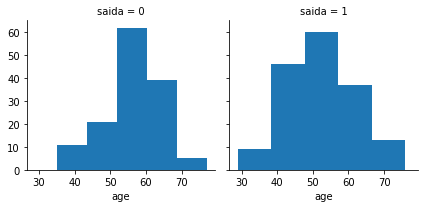

In [245]:
g = sns.FacetGrid(df, col='saida')
g.map(plt.hist, 'age', bins=5
    )

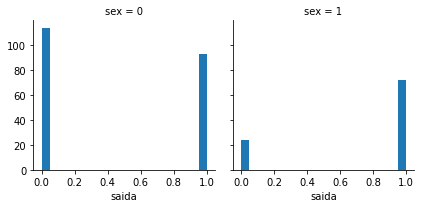

In [246]:
g = sns.FacetGrid(df, col='sex')
g.map(plt.hist, 'saida', bins=20
    )

In [247]:
df['faixa'] = pd.cut(df['age'],5)
df[['faixa','saida']].groupby(['faixa'],as_index=False).mean().sort_values(by='faixa',ascending=True)


,faixa,saida
0,"(28.952, 38.6]",0.750000
1,"(38.6, 48.2]",0.704225
2,"(48.2, 57.8]",0.577320
3,"(57.8, 67.4]",0.377358
4,"(67.4, 77.0]",0.588235


In [248]:
df.loc[df['age']<=29,'age'] = 0
df.loc[(df['age']>29) & (df['age']<=39),'age'] = 1
df.loc[(df['age']>39) & (df['age']<=49),'age'] = 2
df.loc[(df['age']>49) & (df['age']<=58),'age'] = 3
df.loc[(df['age']>58) & (df['age']<=68),'age'] = 4
df.loc[(df['age']>68) & (df['age']<=77),'age'] = 5
df.loc[df['age'] > 77,'age'] = 6

In [249]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,saida,faixa
0,4,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes,1,"(57.8, 67.4]"
1,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes,1,"(28.952, 38.6]"
2,2,1,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes,1,"(38.6, 48.2]"
3,3,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes,1,"(48.2, 57.8]"
4,3,1,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,yes,1,"(48.2, 57.8]"


In [250]:
df.head()
df.drop('target', axis=1, inplace = True)
df.drop('faixa', axis=1, inplace = True)


In [251]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,saida
0,4,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,1,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,3,1,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [252]:
y = df['saida']
x = df.drop('saida',axis=1)


In [254]:
df.isnull().values.any()

False

In [255]:
from sklearn.model_selection import train_test_split

x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.5)

x_tr.shape, y_tr.shape, x_test.shape,y_test.shape

((151, 13), (151,), (152, 13), (152,))

In [256]:
#tipo de modelo1
resultado = []
from sklearn.ensemble import ExtraTreesClassifier

for i in range(10): #gera o modelo 10x
    modelo = ExtraTreesClassifier()
    modelo.fit(x_tr,y_tr)
    y_pred = (x_test)
    resultado.append(modelo.score(x_test,y_test))
print(np.mean(resultado))

0.8243421052631579


In [257]:
#regressão logistica
from sklearn.linear_model import LogisticRegression
modelo2 = LogisticRegression()
modelo2.fit(x_tr,y_tr)
y_pred = modelo2.predict(x_test)
print(modelo2.score(x_test,y_test))


0.8486842105263158


C:\Users\johnn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [258]:
from sklearn.ensemble import RandomForestClassifier
modelo4 = RandomForestClassifier()
modelo4.fit(x_tr,y_tr)
y_pred = modelo4.predict(x_test)
print(modelo4.score(x_test,y_test))

0.8289473684210527
